## Preprocessing practice with Adult data

Now it is time to try ourselves so let us use the Adult data again to do some FC/FS, etc.  Reload libraries and data as we did in the cleaning lab.  

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup complete.")

Setup complete.


## Loading the data
Now we begin by loading the data as we have done before and printing the `.head()` to inspect the data.  Load the data as the Adult_data data frame. We will use that through the lab. You have already explored this dataset in detail so you know already quite a bit about it, hopefully!


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

<Axes: xlabel='income', ylabel='count'>

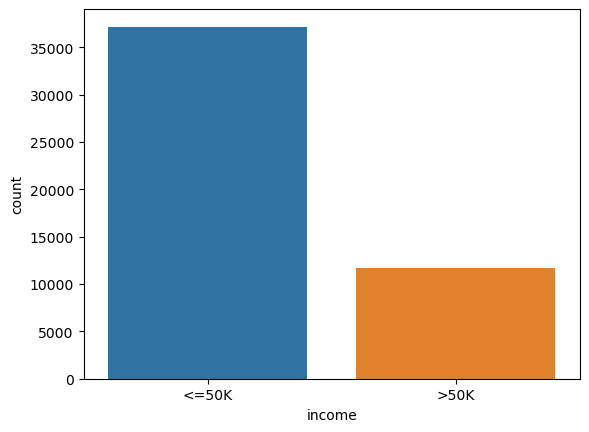

In [2]:
#designate the path where you saved your Adult data
Adult_data_path = "/Users/ringi/Documents/code/data-mining/datasets/adult.csv"

#Load the data using pandas read_csv function. 
Adult_data = pd.read_csv(Adult_data_path)

#Show the first and last few records to check data is loading correctly
print(Adult_data.head())
print(Adult_data.tail())

#Show distribution of the class on whole dataset
sns.countplot(x= 'income', data=Adult_data)


## Data exploration

Let us examine what type of attributes may be to understand which are non numeric and may need encoding.

In [3]:
Adult_data.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We can now divide our columns in to the categorical and numerical columns. Make a list of categorical and numerical columns.  We may already discard 'fnlwgt' at this stage as it is not a useful variable for the prediction of income.  We can exclude it here.  

In [4]:
Adult_Categorical = ["workclass", "education","marital-status","occupation", "relationship","race","gender","native-country","income"]

Adult_Numeric = ["age", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]

print(Adult_data[Adult_Categorical].head())
print(Adult_data[Adult_Numeric].head())

   workclass     education      marital-status         occupation  \
0    Private          11th       Never-married  Machine-op-inspct   
1    Private       HS-grad  Married-civ-spouse    Farming-fishing   
2  Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3    Private  Some-college  Married-civ-spouse  Machine-op-inspct   
4          ?  Some-college       Never-married                  ?   

  relationship   race  gender native-country income  
0    Own-child  Black    Male  United-States  <=50K  
1      Husband  White    Male  United-States  <=50K  
2      Husband  White    Male  United-States   >50K  
3      Husband  Black    Male  United-States   >50K  
4    Own-child  White  Female  United-States  <=50K  
   age  educational-num  capital-gain  capital-loss  hours-per-week
0   25                7             0             0              40
1   38                9             0             0              50
2   28               12             0             0      

For the categorical values, we can find the number of unique fields in each to understand the different types of encodings that we may apply.  If we have too many unique values then hot-encoding may not be right and we may use a `ordinal encoding` instead.   

In [5]:
print(Adult_data[Adult_Categorical].info())
print("Check secondary dimension")
print(Adult_data[Adult_Categorical].nunique().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       48842 non-null  object
 1   education       48842 non-null  object
 2   marital-status  48842 non-null  object
 3   occupation      48842 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   gender          48842 non-null  object
 7   native-country  48842 non-null  object
 8   income          48842 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB
None
Check secondary dimension
native-country    42
education         16
occupation        15
workclass          9
marital-status     7
relationship       6
race               5
gender             2
income             2
dtype: int64


## Feature construction

One column that we could transform is _native-country_ as it has too many values to be useful.  Let us first visualise it against the decision or target variable _income_.

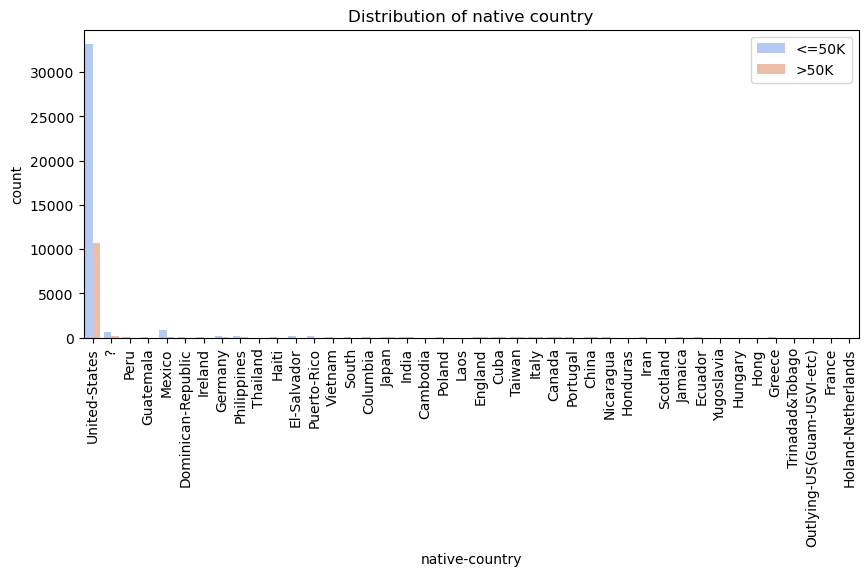

In [6]:

    """ Make distribution plots of df for a defined column using hue"""
    plt.figure(figsize=(10,4))
    #Set labels to be vertical in the axis
    plt.xticks(rotation=90)
    # produce a plot 
    sns.countplot(x="native-country", hue="income",palette="coolwarm", data=Adult_data)
    #include a dynamic title
    plt.title("Distribution of native country")
     #include a legend
    plt.legend()



It is clear that it has to many not particularly useful values.  We could convert this to a variable that has a value of 1 if the person has 'United_States' as 'native-country' and 0 for all others.  So we count those born in the USA against all others.  Transform the variable in this way. 

In [7]:
Adult_data['native-US'] = np.where(Adult_data['native-country']== 'United-States', 1.0, 0.0)
print(Adult_data)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

Now visualise it again, against the target variable. 

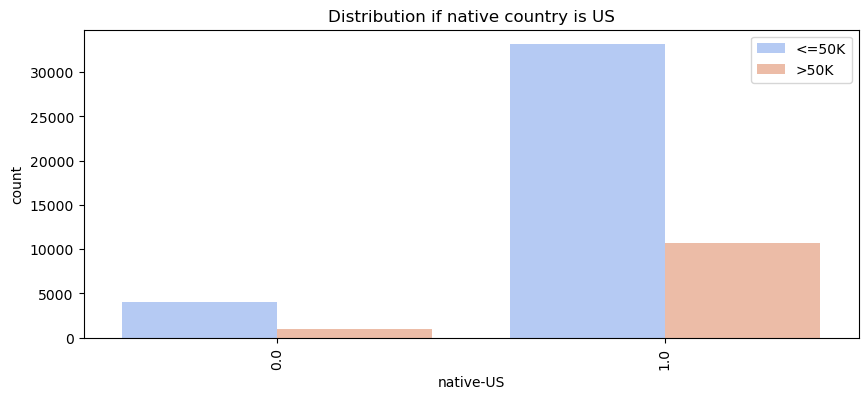

In [8]:

""" Make distribution plots of df for a defined column using hue"""
plt.figure(figsize=(10,4))
#Set labels to be vertical in the axis
plt.xticks(rotation=90)
# produce a plot 
sns.countplot(x="native-US", hue="income",palette="coolwarm", data=Adult_data)
#include a dynamic title
plt.title("Distribution if native country is US")
#include a legend
plt.legend()


We can also perhaps combine _capital_gain_ and _capital-loss_ into a more useful variable.  Let us see what there values may look like against one another.  We can do this by creating a scatterplot to show _capital_gain_ against _capital-loss_. 

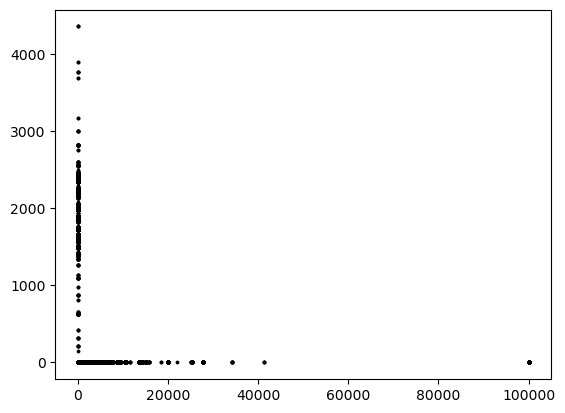

In [9]:

#Use scatter 
plt.scatter(Adult_data['capital-gain'], Adult_data['capital-loss'], color='k', s=3, label='Capital Gain vs Capital Loss')

It seems to show that when _capital-loss_ has a non zero value _capital-gain_ is zero and viceversa.  To make sure this is the case, let us select any records which have both  _capital_gain_ and _capital-loss_ as positive values. 

In [10]:
print(Adult_data.loc[(Adult_data['capital-gain']>0) & (Adult_data['capital-loss'] > 0)])

print(Adult_data.loc[(Adult_data['capital-gain']==0) & (Adult_data['capital-loss'] == 0)])



Empty DataFrame
Columns: [age, workclass, fnlwgt, education, educational-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income, native-US]
Index: []
       age  workclass  fnlwgt     education  educational-num  \
0       25    Private  226802          11th                7   
1       38    Private   89814       HS-grad                9   
2       28  Local-gov  336951    Assoc-acdm               12   
4       18          ?  103497  Some-college               10   
5       34    Private  198693          10th                6   
...    ...        ...     ...           ...              ...   
48836   22    Private  310152  Some-college               10   
48837   27    Private  257302    Assoc-acdm               12   
48838   40    Private  154374       HS-grad                9   
48839   58    Private  151910       HS-grad                9   
48840   22    Private  201490       HS-grad                9   

        

Since there are no records, we could transform these two into a new variable, say _GainLoss_ which has a value of -1 if the person reported any _capital-loss_, 1, if they reported a _capital-gain_ and 0 of they reported neither.  

In [11]:
# create a list of our conditions
conditions = [
    (Adult_data['capital-gain'] > 0),
    (Adult_data['capital-loss'] > 0),
    ((Adult_data['capital-gain'] == 0) & (Adult_data['capital-loss']== 0))
    ]


# create a list of the values we want to assign for each condition
values = [1.0, -1.0, 0.0]

# create a new column and use np.select to assign values to it using our lists as arguments
Adult_data['GainLoss'] = np.select(conditions, values)

# display updated DataFrame
Adult_data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,native-US,GainLoss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,1.0,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,1.0,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1.0,0.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1.0,1.0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,1.0,0.0


We can now visualise values for the new variable against the _income_.

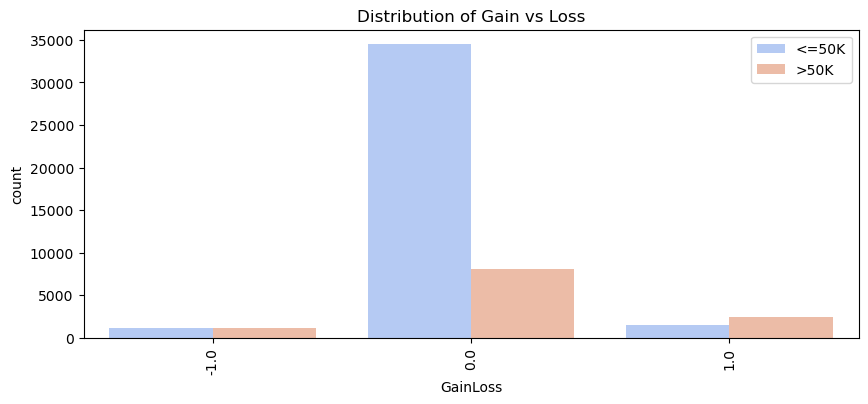

In [12]:
""" Make distribution plots of df for a defined column using hue"""
plt.figure(figsize=(10,4))
#Set labels to be vertical in the axis
plt.xticks(rotation=90)
# produce a plot 
sns.countplot(x="GainLoss", hue="income",palette="coolwarm", data=Adult_data)
#include a dynamic title
plt.title("Distribution of Gain vs Loss")
#include a legend
plt.legend()

## Categorical encoding
So we have transformed or created a couple of variables.  What categorical variables are now left in the data frame? 

In [13]:
# print(Adult_data.select_dtypes(exclude=["number","bool_","object_"]))

print(Adult_data.select_dtypes(include=["object"]))

# Is GainLoss considered categorical?? is Native-US??

print(Adult_data['marital-status'].unique())

print(Adult_data['relationship'].unique())

print(Adult_data[Adult_Categorical].nunique().sort_values(ascending=False))

          workclass     education      marital-status         occupation  \
0           Private          11th       Never-married  Machine-op-inspct   
1           Private       HS-grad  Married-civ-spouse    Farming-fishing   
2         Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3           Private  Some-college  Married-civ-spouse  Machine-op-inspct   
4                 ?  Some-college       Never-married                  ?   
...             ...           ...                 ...                ...   
48837       Private    Assoc-acdm  Married-civ-spouse       Tech-support   
48838       Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
48839       Private       HS-grad             Widowed       Adm-clerical   
48840       Private       HS-grad       Never-married       Adm-clerical   
48841  Self-emp-inc       HS-grad  Married-civ-spouse    Exec-managerial   

      relationship   race  gender native-country income  
0        Own-child  Black    

Choose some of those to be encoded with an `OrdinalEncoder` and perform the encoding.  Put the encoded new variables along with the other data in a new data frame called `X`.  I will leave the smallest 3 in terms of list amount of unique values for `OneHotEncoding`.

In [14]:

# from sklearn.preprocessing import CategoricalEncoder
import category_encoders as ce

# We establish the Ordinal encoder which will convert each categorical label to a number
# We specify the columns we want to transform, we ask it to handle missing values if any and also to return a dataframe instead of an np array
enc = ce.OrdinalEncoder(cols=["education","occupation","workclass","marital-status"],handle_missing='return_nan',return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
X=enc.fit_transform(Adult_data)
type(X)

/usr/local/Caskroom/mambaforge/base/envs/uea/lib/python3.12/site-packages/category_encoders/ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
/usr/local/Caskroom/mambaforge/base/envs/uea/lib/python3.12/site-packages/category_encoders/ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

pandas.core.frame.DataFrame

Now look at the contents of X so far. 

In [15]:
X.head()

#Drop unecessary columns and hence set the final columns we will use as a list of column names
X= X.drop(columns=['fnlwgt','native-country', 'capital-gain','capital-loss'])


Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'income', 'native-US', 'GainLoss'],
      dtype='object')


Let us perform `OneHotEncoding` for some other variables such as _gender_.  Append the new variables to _X_.

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc2 = OneHotEncoder(handle_unknown='ignore')

# passing body_style column
enc_df = pd.DataFrame(enc2.fit_transform(X[['gender']]).toarray())
print(enc_df.columns)
# X=X.join(enc_df)
print(X)
enc_df.columns = enc2.get_feature_names_out(['gender'])
print(enc_df)
print(X.shape)
X= pd.concat([X, enc_df], axis=1)
print(X)


RangeIndex(start=0, stop=2, step=1)
       age  workclass  education  educational-num  marital-status  occupation  \
0       25        1.0        1.0                7             1.0         1.0   
1       38        1.0        2.0                9             2.0         2.0   
2       28        2.0        3.0               12             2.0         3.0   
3       44        1.0        4.0               10             2.0         1.0   
4       18        3.0        4.0               10             1.0         4.0   
...    ...        ...        ...              ...             ...         ...   
48837   27        1.0        3.0               12             2.0        10.0   
48838   40        1.0        2.0                9             2.0         1.0   
48839   58        1.0        2.0                9             3.0         8.0   
48840   22        1.0        2.0                9             1.0         8.0   
48841   52        7.0        2.0                9             2.0        

Let us do similar `OneHotEncoding` encoding of _Race_ and append to`X`.

In [17]:
enc3 = OneHotEncoder(handle_unknown='ignore')

# passing body_style column
enc_df1 = pd.DataFrame(enc3.fit_transform(X[['race']]).toarray())
print(enc_df1.columns)
# X=X.join(enc_df)
print(X)
enc_df1.columns = enc3.get_feature_names_out(['race'])
print(enc_df1)
print(X.shape)
X= pd.concat([X, enc_df1], axis=1)
print(X)




RangeIndex(start=0, stop=5, step=1)
       age  workclass  education  educational-num  marital-status  occupation  \
0       25        1.0        1.0                7             1.0         1.0   
1       38        1.0        2.0                9             2.0         2.0   
2       28        2.0        3.0               12             2.0         3.0   
3       44        1.0        4.0               10             2.0         1.0   
4       18        3.0        4.0               10             1.0         4.0   
...    ...        ...        ...              ...             ...         ...   
48837   27        1.0        3.0               12             2.0        10.0   
48838   40        1.0        2.0                9             2.0         1.0   
48839   58        1.0        2.0                9             3.0         8.0   
48840   22        1.0        2.0                9             1.0         8.0   
48841   52        7.0        2.0                9             2.0        

Finally, let us also `OneHotEncode` the _relationship_ attribute and append also to `X`. 

In [18]:
enc4 = OneHotEncoder(handle_unknown='ignore')

# passing body_style column
enc_df2 = pd.DataFrame(enc4.fit_transform(X[['relationship']]).toarray())
print(enc_df2.columns)
# X=X.join(enc_df)
print(X)
enc_df2.columns = enc4.get_feature_names_out(['relationship'])
print(enc_df2)
print(X.shape)
X= pd.concat([X, enc_df2], axis=1)
print(X)


#Drop unecessary columns and hence set the final columns we will use as a list of column names
X= X.drop(columns=['relationship','race', 'gender'])
FinalCols = X.columns

RangeIndex(start=0, stop=6, step=1)
       age  workclass  education  educational-num  marital-status  occupation  \
0       25        1.0        1.0                7             1.0         1.0   
1       38        1.0        2.0                9             2.0         2.0   
2       28        2.0        3.0               12             2.0         3.0   
3       44        1.0        4.0               10             2.0         1.0   
4       18        3.0        4.0               10             1.0         4.0   
...    ...        ...        ...              ...             ...         ...   
48837   27        1.0        3.0               12             2.0        10.0   
48838   40        1.0        2.0                9             2.0         1.0   
48839   58        1.0        2.0                9             3.0         8.0   
48840   22        1.0        2.0                9             1.0         8.0   
48841   52        7.0        2.0                9             2.0        

## Feature selection

Let us look at all our numeric columns now present in `X`. We can select those as the columns we will use to now do some Feature Selection.  

In [27]:

print(FinalCols)
print(X.head())

from sklearn.feature_selection import SelectKBest, f_classif




Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'hours-per-week', 'income', 'native-US', 'GainLoss',
       'gender_Female', 'gender_Male', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife'],
      dtype='object')
   age  workclass  education  educational-num  marital-status  occupation  \
0   25        1.0        1.0                7             1.0         1.0   
1   38        1.0        2.0                9             2.0         2.0   
2   28        2.0        3.0               12             2.0         3.0   
3   44        1.0        4.0               10             2.0         1.0   
4   18        3.0        4.0               10             1.0         4.0   

   hours-per-week income  native-US  GainL

Let us now make a new version of 'X', say 'X1', which contains the numeric columns we just selected.  Let us define our new `X1` which will contain all the numeric input features, and `y`, our oputput variable, which is still _income_.

In [31]:
#Specify the features to consider and the Y values.  
feature_cols = FinalCols
X1 = X[feature_cols]
X1 = X1.drop(columns=['income'])
Y=X['income']

Now, you can call a feature ranking algorithm to rank all the features on `X1` using the `mutual_info_classif` criterion.  

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Keep all features but rank them by best mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k='all')


#Fit and apply feature ranking method
X_new = selector.fit_transform(X1, Y)

#Retrieve the column names for the selected columns
names = X1.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)
#Look at shape of new data
X_new.shape





                     Feat_names  Mutual_info
4                marital-status     0.112302
16         relationship_Husband     0.084162
5                    occupation     0.068447
0                           age     0.066596
2                     education     0.065849
..                          ...          ...
7                     native-US     0.003739
18  relationship_Other-relative     0.001171
12      race_Asian-Pac-Islander     0.001155
11      race_Amer-Indian-Eskimo     0.000729
14                   race_Other     0.000150

[22 rows x 2 columns]


(48842, 22)

Display the feature names with their score in order of ranking. 

In [41]:
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       # 'display.precision', 2,
                       ):
    print(ns_df_sorted)

                     Feat_names  Mutual_info
4                marital-status     0.112302
16         relationship_Husband     0.084162
5                    occupation     0.068447
0                           age     0.066596
2                     education     0.065849
3               educational-num     0.064158
8                      GainLoss     0.043893
6                hours-per-week     0.042914
19       relationship_Own-child     0.035910
10                  gender_Male     0.028022
9                 gender_Female     0.027286
17   relationship_Not-in-family     0.021635
1                     workclass     0.017414
20       relationship_Unmarried     0.015139
15                   race_White     0.010130
13                   race_Black     0.005782
21            relationship_Wife     0.004238
7                     native-US     0.003739
18  relationship_Other-relative     0.001171
12      race_Asian-Pac-Islander     0.001155
11      race_Amer-Indian-Eskimo     0.000729
14        

### Correlation of variables 

This may have difficulty medium as we have not covered it but it is for you to do some research on how to do new things to the data finding the relevant functions, methods, etc.  

Just to finish, you could look also at the correlation between different variables.  Correlation can also sometimes be used to choose different variables (for example eliminating those that are highly correlated).  For this you will can call the correlation function from Pandas  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

Now we can visualise the correlations by using a `heatmap` from seaborn https://seaborn.pydata.org/generated/seaborn.heatmap.html

We could also select columns on the basis of the correlation calculations, for example we could select those where the correlation is greater than some threshold value (say 0.7).

Before you leave the lab you may spend sometime thinking about how we will put all of what we have learned together.  For example, to now go and analyse the Adult data with different classification algorithms, what steps should you apply to the data and in what order?  Do you look at missing data? outliers? balancing? FC? FS? Sampling?  Which of those do you apply to the data before spliting into train and test set and which to the train set only? 